In [1]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

# import & read_csv

In [29]:
df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather.isna().sum()
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

# 날씨 데이터: 평균 온도 및 평균 습도, 강수량

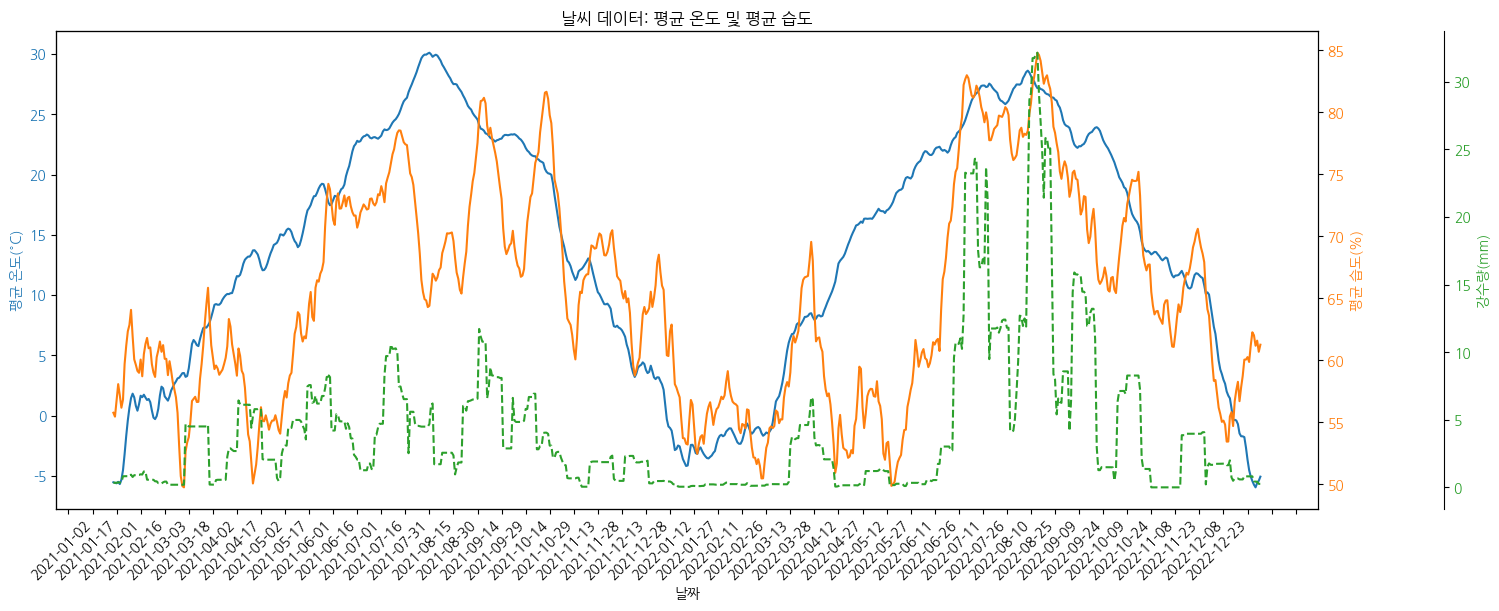

In [53]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = df_weather['HumidAvg']
humid_date = df_weather['RainfallAmount']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).mean()
rolling_average_humid = humid_date.rolling(window=window).mean()


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

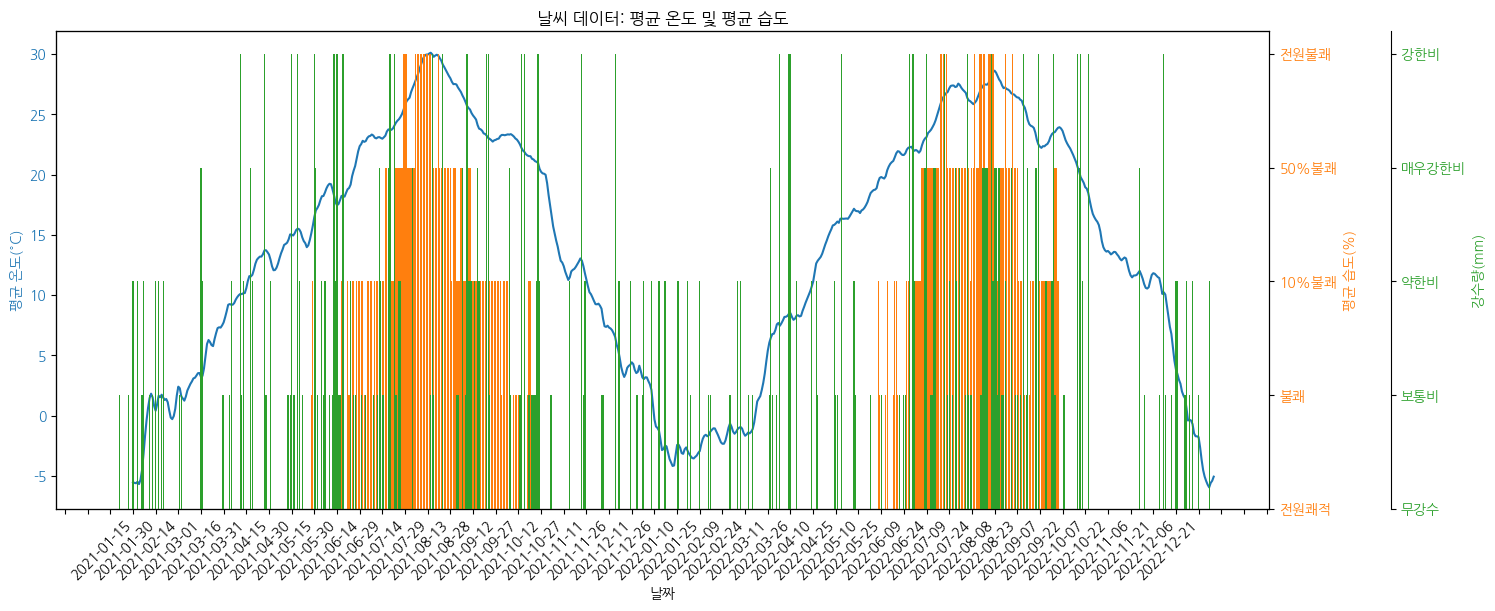

In [54]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
# rainfall_date = df_weather['discomfortIndex']
# humid_date = df_weather['classRainfall']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
# rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
# rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])

# # 범주형 변수의 중심값 사용
# rolling_center_discomfort = rainfall_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())
# rolling_center_rainfall = humid_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],df_weather['discomfortIndex'], color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],df_weather['classRainfall'], color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

# 날씨 데이터: 평균 온도 및 불쾌지수, 강수척도

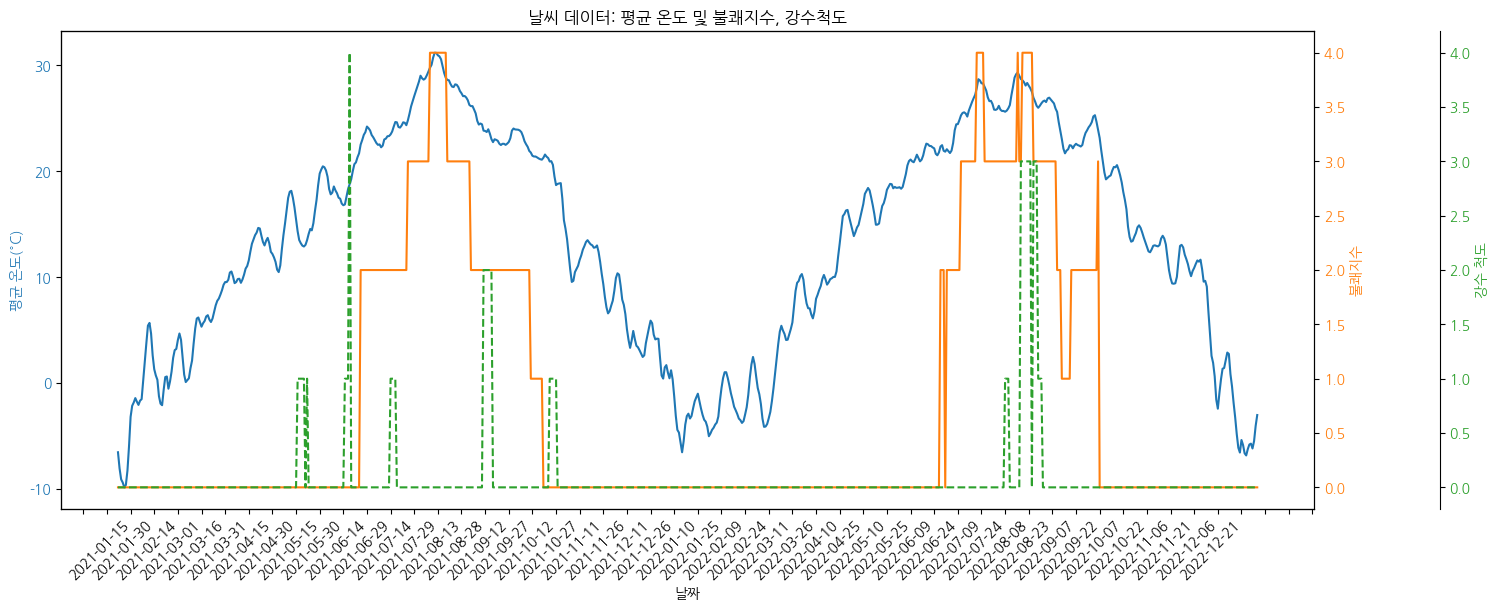

In [56]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

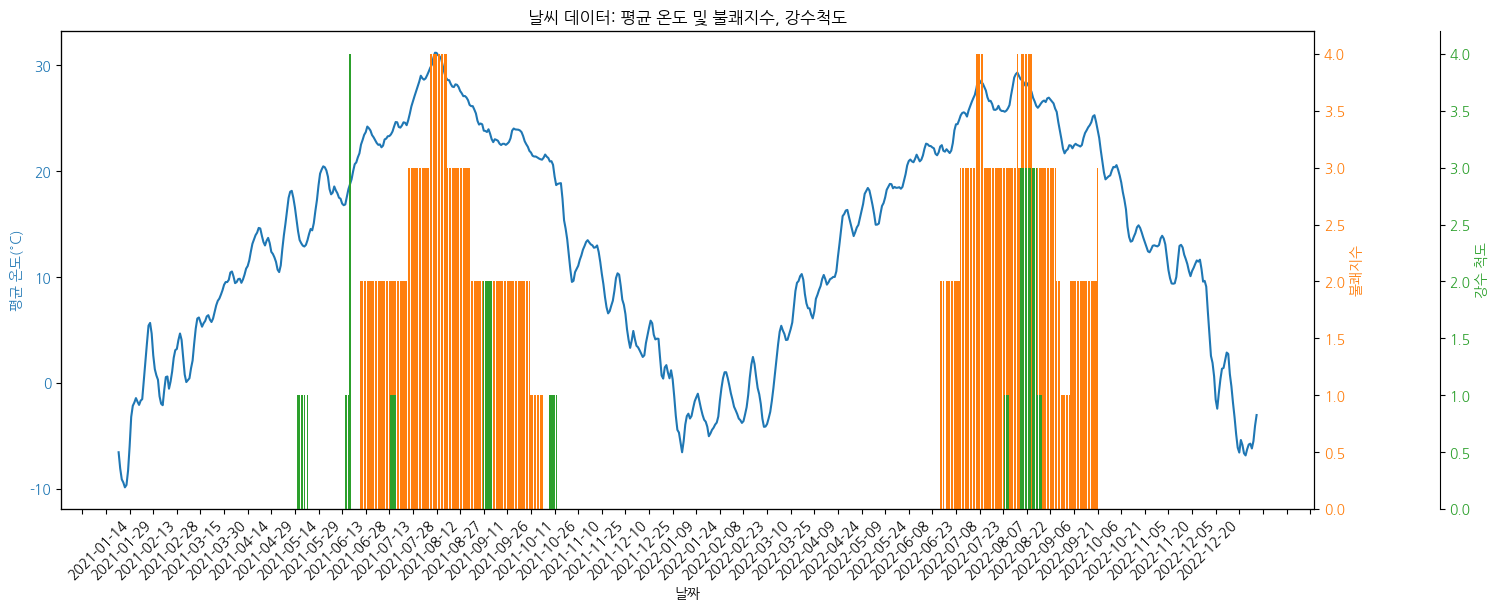

In [58]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],rolling_average_rainfall.values, color='tab:orange', label='평균 습도')

# ax2.plot(weather_data['dateObs'],
#          # weather_data['HumidAvg'],
#          rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

# 날씨 데이터: 불쾌지수, 강수척도별 매출 비교

In [90]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']

In [100]:
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [102]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,...,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,Cost,Grade,TempAvg,classRainfall,discomfortIndex
0,U101066,10337,2021-05-31,2021,5,31,0,05:19:59,남성,10대,...,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,3436000,실버,19.9,보통비,전원쾌적
1,U101094,10248,2021-05-31,2021,5,31,0,18:19:36,남성,10대,...,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,2875310,실버,19.9,보통비,전원쾌적
2,U101077,10244,2021-05-31,2021,5,31,0,03:47:12,남성,30대,...,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,3573800,실버,19.9,보통비,전원쾌적
3,U101084,10233,2021-05-31,2021,5,31,0,08:05:19,남성,30대,...,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,3004400,실버,19.9,보통비,전원쾌적
4,U101054,10131,2021-05-31,2021,5,31,0,02:06:37,여성,40대,...,간편식사,M2,샌드위치,샌)더블에그파니니,4000,2289900,실버,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,10035,2022-02-27,2022,2,27,6,07:06:40,남성,40대,...,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,2037570,실버,3.7,무강수,전원쾌적
509296,U100989,10039,2022-02-27,2022,2,27,6,21:03:30,남성,60대이상,...,음료,M2,아이스,22del)스윗아메리카노230,900,2173690,실버,3.7,무강수,전원쾌적
509297,U100977,10115,2022-02-27,2022,2,27,6,22:08:15,남성,20대,...,음료,M1,음료,코카)크래프트아메P470ml,2500,2248060,실버,3.7,무강수,전원쾌적
509298,U101098,10023,2022-02-27,2022,2,27,6,04:55:10,남성,30대,...,음료,M1,음료,코카)조지아맥스캔,1200,2035190,실버,3.7,무강수,전원쾌적


In [115]:
grouped_sales

classRainfall  discomfortIndex
강한비            10%불쾌               14838950
               50%불쾌                7936880
               불쾌                  11493600
               전원불쾌                 4751200
               전원쾌적                46150060
매우강한비          10%불쾌               20893160
               50%불쾌               27200760
               불쾌                   2707650
               전원불쾌                 2884840
               전원쾌적                14073170
무강수            10%불쾌              143142520
               50%불쾌              103462790
               불쾌                  35045460
               전원불쾌                58584480
               전원쾌적               748367470
보통비            10%불쾌               34043500
               50%불쾌               36542640
               불쾌                  19335600
               전원불쾌                 4046860
               전원쾌적               128938950
약한비            10%불쾌               13640580
               50%불쾌               14035470
 

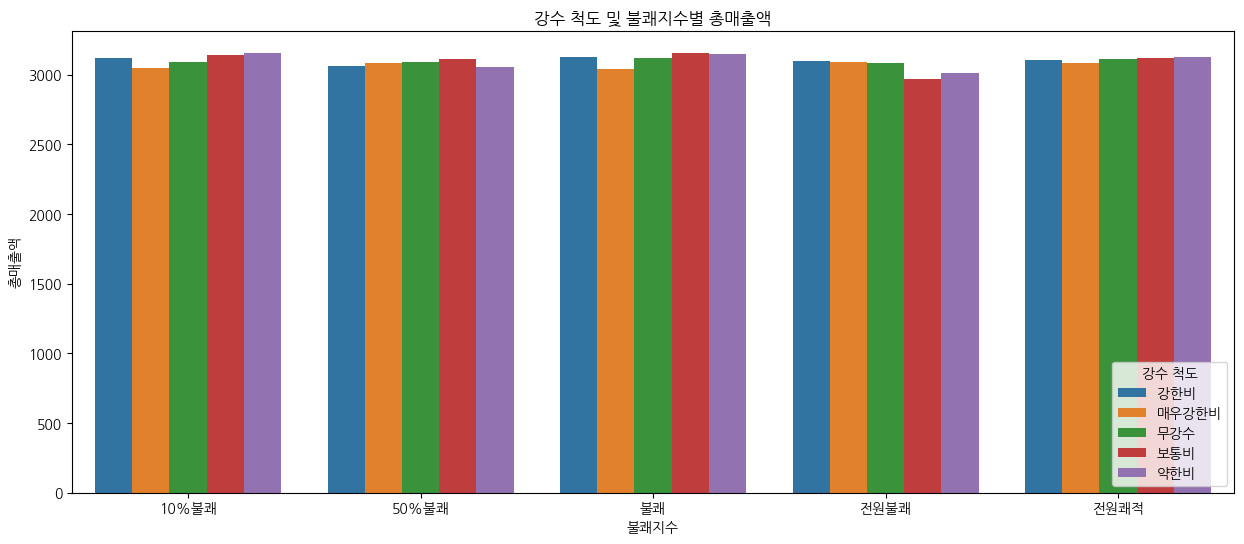

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].mean()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

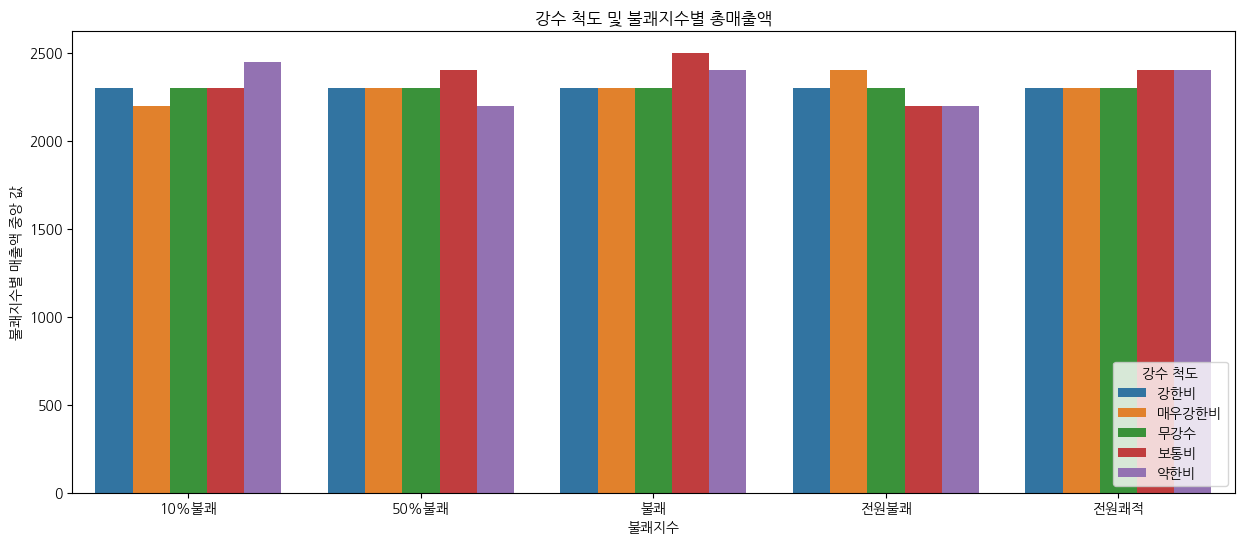

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

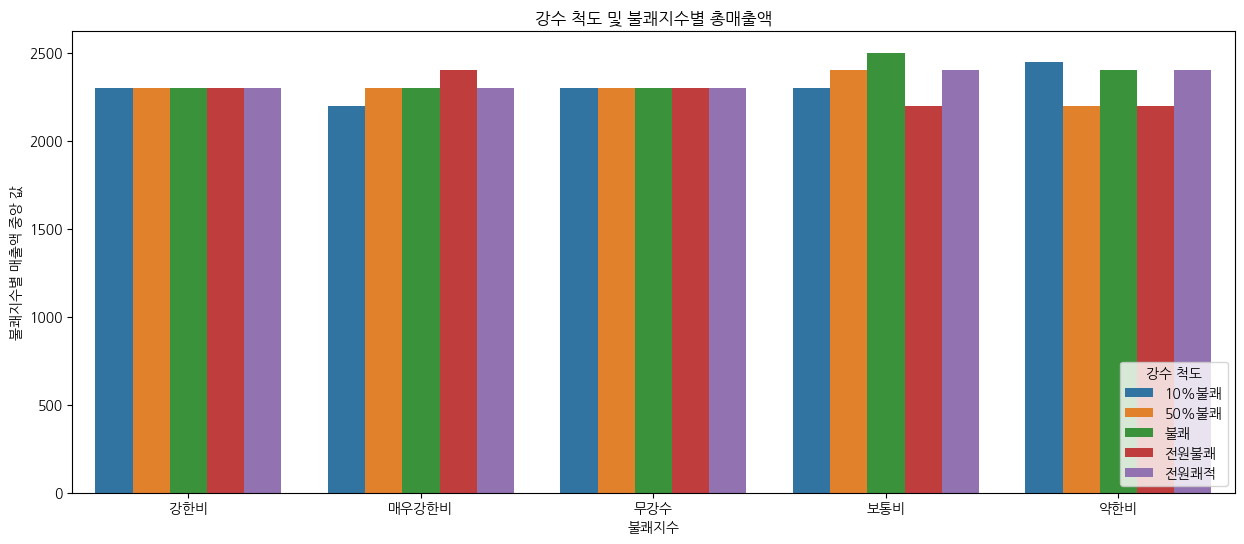

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='classRainfall', y='Price', hue='discomfortIndex')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## log 씌운것

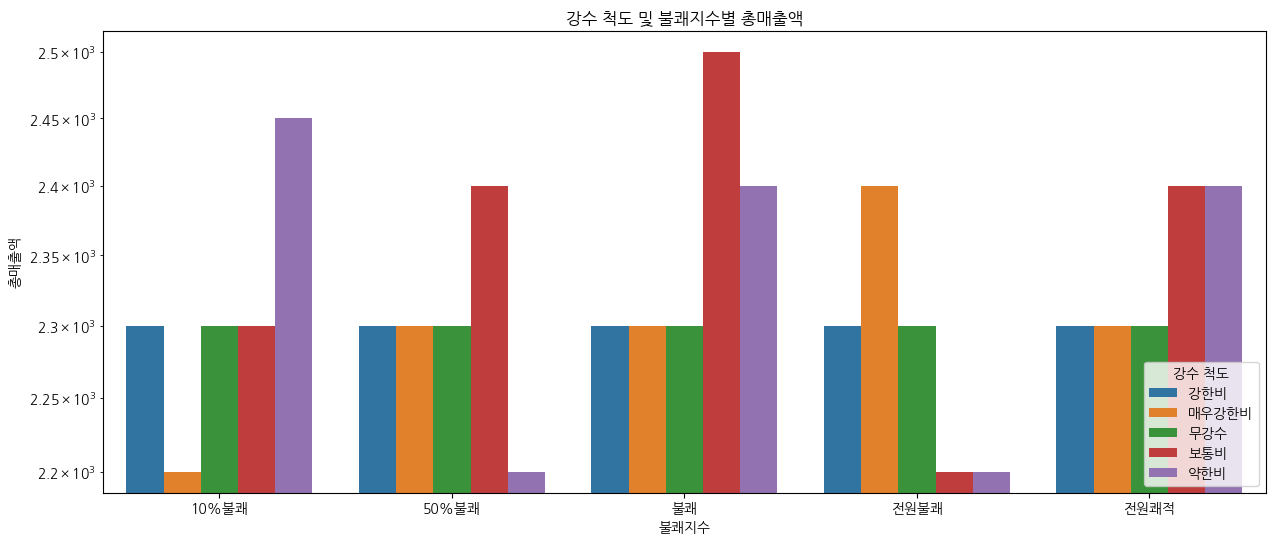

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

plt.yscale('log')# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## 상관관계

# 온도와 매출

In [193]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4

11.0

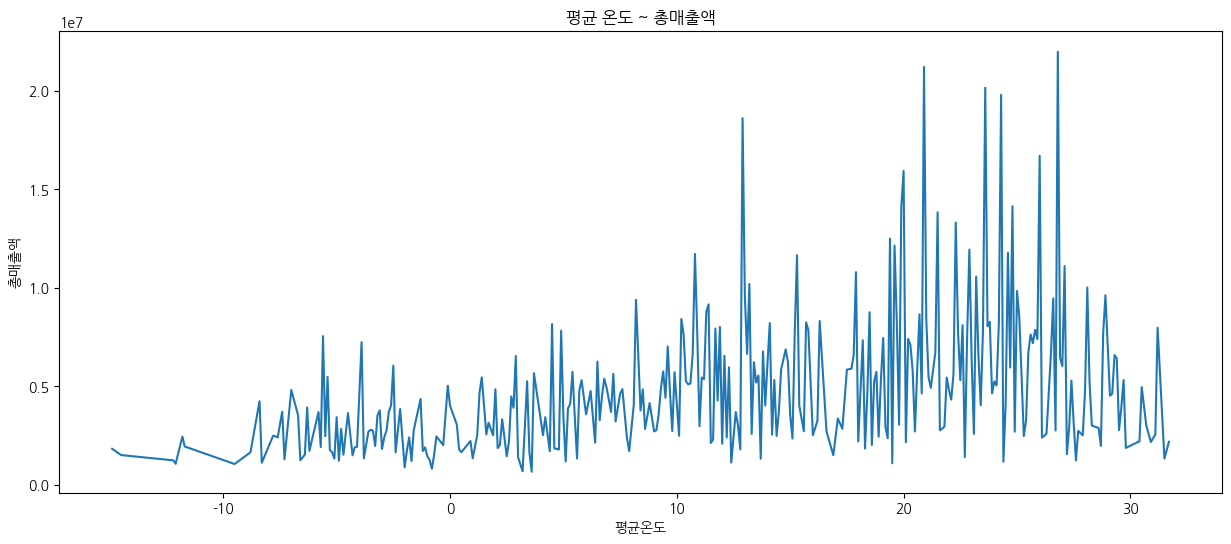

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['TempAvg'])['Price'].sum()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None)

# plt.yscale('log')
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도')
plt.ylabel('총매출액')
# plt.legend(title='강수 척도', loc='lower right')

plt.show()

In [157]:
grouped_sales.reset_index()

,TempAvg,Price
0,-14.9,1828450
1,-14.5,1509440
2,-12.2,1242790
3,-12.1,1065810
4,-11.8,2446830
...,...,...
325,30.9,2174160
326,31.1,2552500
327,31.2,7976900
328,31.5,1334220


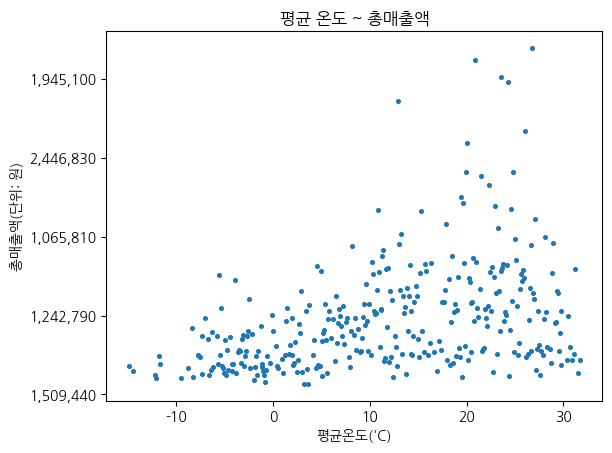

In [204]:


plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)



plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')




# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()

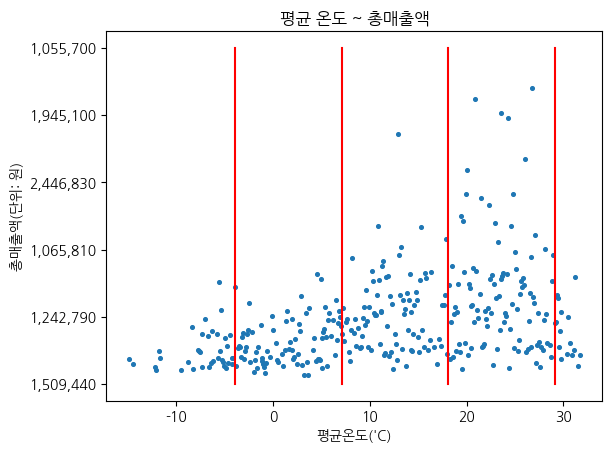

In [203]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4


x_m = [m_t+(M_t-m_t)//4, m_t+(M_t-m_t)//4]
x_9 = [m_t+(M_t-m_t)//4*2, m_t+(M_t-m_t)//4*2]
x_20 = [m_t+(M_t-m_t)//4*3, m_t+(M_t-m_t)//4*3]
x_22 = [m_t+(M_t-m_t)//4*4, m_t+(M_t-m_t)//4*4]

# x = [0, ]

y = [0, 25000000]

plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)
plt.plot(x_m, y,c='r')
plt.plot(x_9, y,c='r')
plt.plot(x_20, y,c='r')
plt.plot(x_22, y,c='r')



plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')




# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()